### What is Bitcoin?

Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. Included here is historical bitcoin market data at 1-min intervals for select bitcoin exchanges where trading takes place

### Dataset

CSV files for select bitcoin exchanges for the time period of Jan 2012 to December March 2021, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time.

### Aim

This notebook aims to perform EDA on Bitcoin prices over the year and analyze its volatility.

### Attributes

1. Timestamp:- Start time of time window (60s window), in Unix time,
2. Open:- Open price at start time window,
3. High:- High price within time window,
4. Low:- Low price within time window,
5. Close:- Close price at end of time window,
6. Volume_(BTC):- Volume of BTC transacted in this window, It's the total amount of Bitcoins traded during that period. Higher volume suggests more activity.
7. Volume_(Currency):- Volume of corresponding currency transacted in this window, It's the total value of transactions in regular currency (like the dollar) during that period.
8. Weighted_Price:- VWAP- This is the average price of Bitcoin during that period, calculated based on trading volume. It gives a more accurate idea of the average price.


## Import libraries

### Load and display the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")## Import libraries### Load and display the dataset


Bad key text.latex.preview in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")## Import libraries### Load and display the dataset


Bad key text.latex.preview in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

### Load and display the dataset

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [3]:
print(df.shape)
df.info()

(4857377, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [4]:
df.describe(include='all')

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [8]:
missing_values = pd.DataFrame({'missing_count': df.isnull().sum(), 
                               'missing_percent': round((df.isnull().sum()/len(df)) * 100,3)})
missing_values

,missing_count,missing_percent
Open,1243608,25.602
High,1243608,25.602
Low,1243608,25.602
Close,1243608,25.602
Volume_(BTC),1243608,25.602
Volume_(Currency),1243608,25.602
Weighted_Price,1243608,25.602


In [9]:
df.duplicated().sum()

1275947

#### Inference : 
1. The dataset consists of 8 fields and 4,857,377 records, including data types of 1 integer and floats.
2. Since the price data is recorded in seconds, there are many discrepancies. Will resample it into Daily bases
3. The dataset contains duplicate values and also includes null values, which constitute around 25%.

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index(df['Timestamp'], inplace=True)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [7]:
df.drop('Timestamp', axis=1, inplace=True)
df.shape

(4857377, 7)

In [25]:
func={
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'mean',
    'Volume_(BTC)':'sum',
    'Volume_(Currency)':'sum',
    'Weighted_Price':'sum'
}

df_new = df.resample('D').apply(func)
df_new

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.58,4.39,4.482500,95.317878,4.253203e+02,1.788641e+01
2012-01-01,4.58,5.00,4.58,4.806667,21.602000,1.057792e+02,1.442000e+01
2012-01-02,5.00,5.00,5.00,5.000000,19.048000,9.524000e+01,5.000000e+00
2012-01-03,5.32,5.32,5.14,5.252500,88.037281,4.648052e+02,4.202000e+01
2012-01-04,4.93,5.57,4.93,5.223333,107.233260,5.680762e+02,4.687343e+01
...,...,...,...,...,...,...,...
2021-03-27,55081.26,56686.15,53948.35,55195.415367,2609.967580,1.443661e+08,7.898169e+07
2021-03-28,55817.85,56573.04,54677.51,55835.012863,2073.449191,1.154652e+08,7.995280e+07
2021-03-29,55790.28,58402.68,54892.42,56915.629993,5360.425663,3.069515e+08,8.172850e+07


In [26]:
print(df_new.isnull().sum())
df_new.describe()

Open                 3
High                 3
Low                  3
Close                3
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3376.000000,3376.000000,3376.000000,3376.000000,3379.000000,3.379000e+03,3.379000e+03
mean,4602.417399,4750.700598,4442.507965,4605.640430,9971.017763,4.466448e+07,6.426429e+06
std,8193.870228,8497.261901,7874.336609,8207.368264,10061.547007,9.046862e+07,1.174122e+07
min,3.800000,4.380000,1.500000,4.331667,0.000000,0.000000e+00,0.000000e+00
25%,244.792500,249.777500,239.952500,244.959590,3981.128166,1.761109e+06,2.523639e+05
50%,696.020000,716.465000,668.265000,697.921509,7325.232456,8.154700e+06,7.461643e+05
75%,7249.760000,7430.267500,7058.395000,7242.417035,12662.704266,5.086097e+07,1.023545e+07
max,61177.030000,61781.830000,58959.570000,60458.888892,137070.178338,1.369434e+09,8.675414e+07


In [27]:
df_new.dropna(inplace=True)
df_new.drop_duplicates(inplace=True)
df_new.shape

(3376, 7)

##### Data Visualization

In [31]:
# Creating a list for numerical columns that are to be visualized
df_new.columns
Column_List = ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
Column_List

['Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price']

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>], dtype=object)

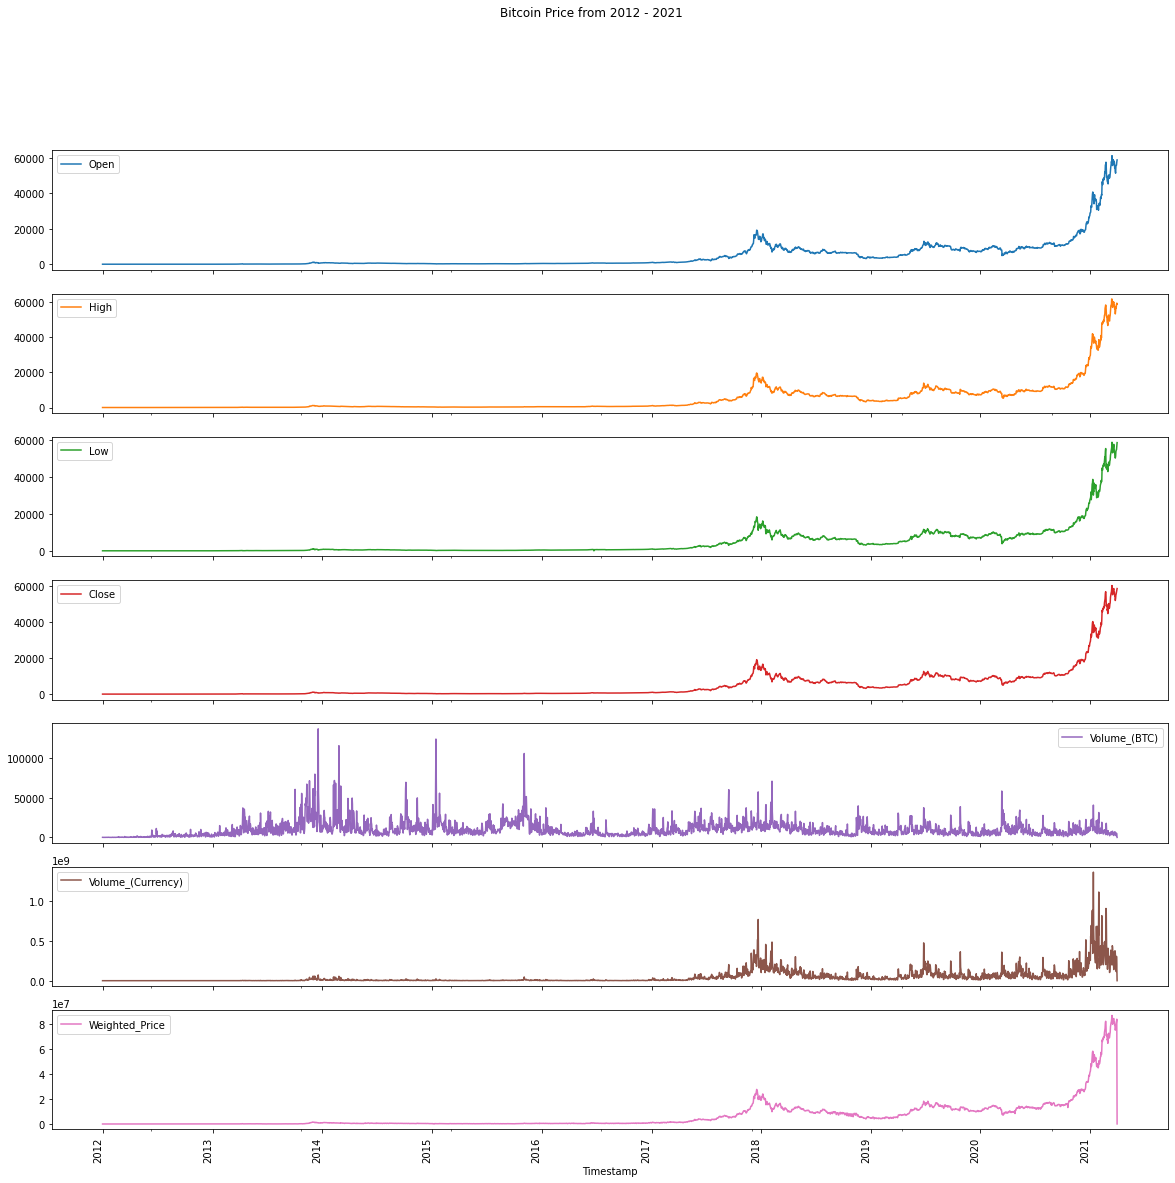

In [37]:
#line plot
df_new.plot( y = Column_List, subplots = True, 
          figsize = (20, 20),
          title = "Bitcoin Price from 2012 - 2021", rot = 90)

We can clearly observe that the first sharp peak in the data occurred in 2018, followed by another after 2020. Prior to these peaks, from 2012 to 2017, flat growth was observed. And for 'Volumne_(BTC)' we can see surge in acitivity in 2014 to 2016, even higher compared to 2020.

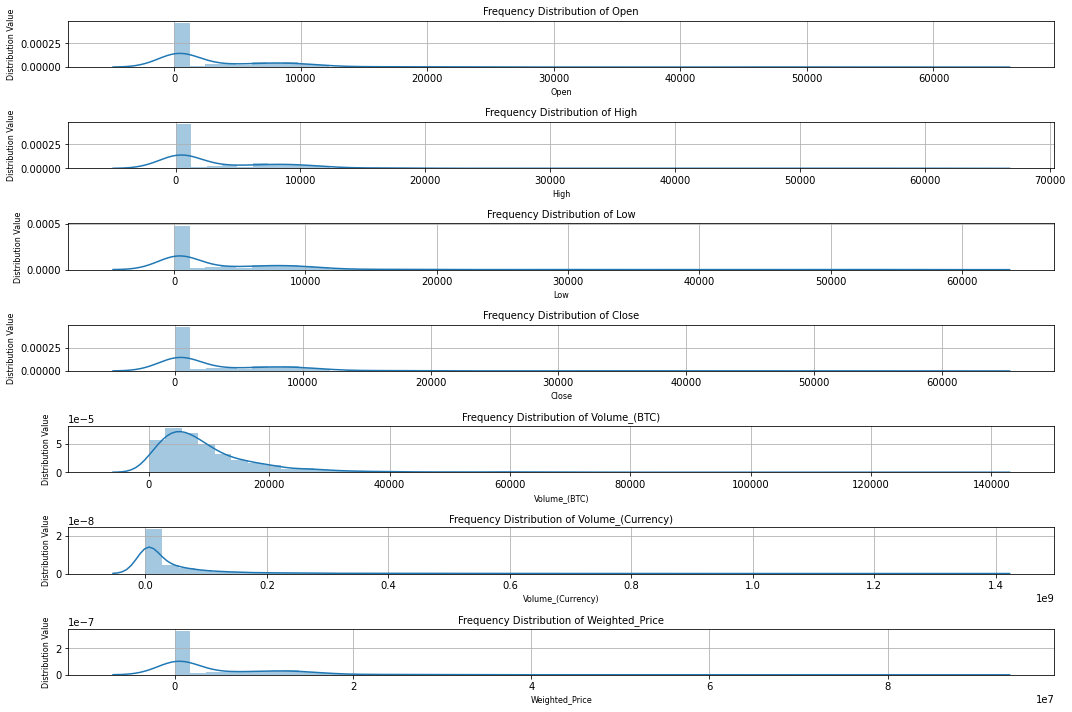

In [32]:
# dist plot
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(df_new[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, 
                     fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) 
    # This will help to provide spaces btw the plots
    ax[i].grid('on') # use to enable the grid lines in the plots.

We can see that most variables exhibit positive skewness, primarily due to the sudden jump in price causing this effect.

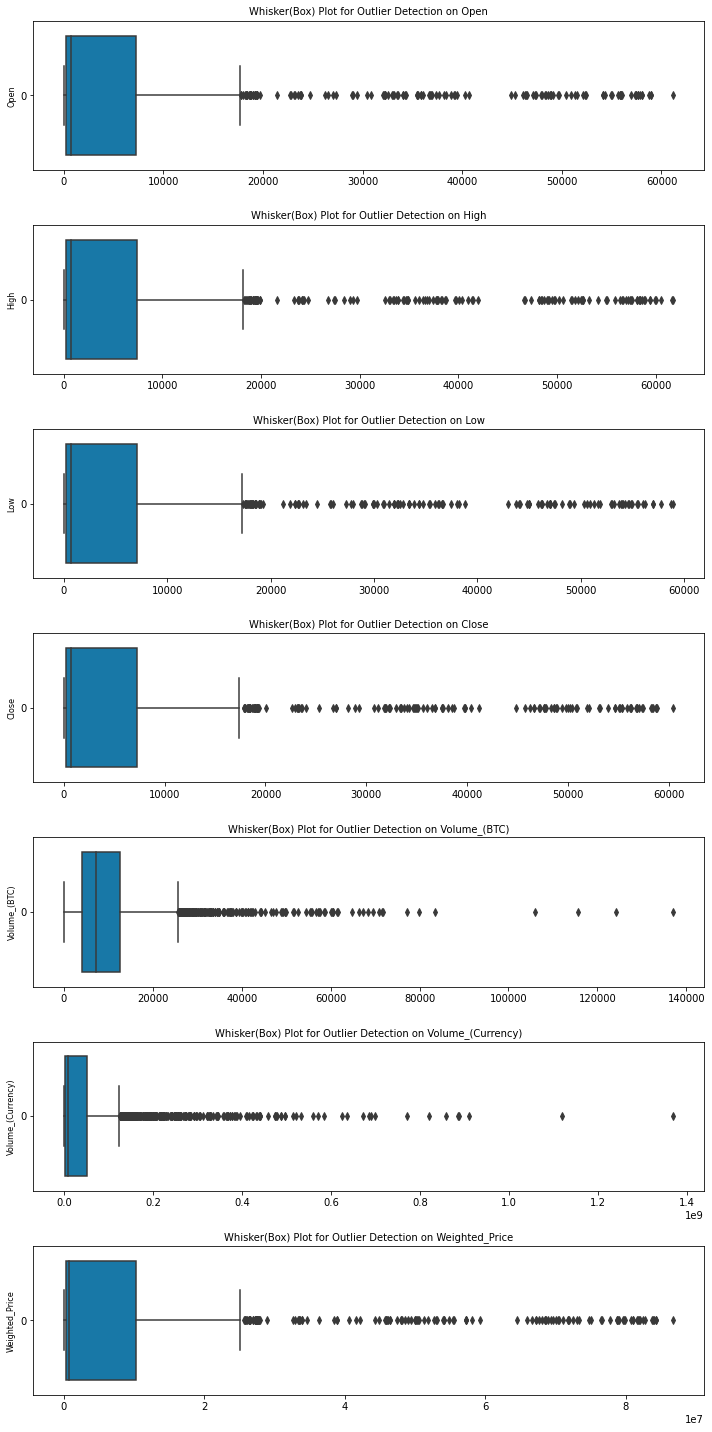

In [33]:
#boxplot
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(df_new[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker(Box) Plot for Outlier Detection on" + " " + 
                    col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

As from the distplot we knew they were right skewed, but 'Open', 'High', 'Low' and 'Close' have outliers which are formed in clusters, whereas  'Volume_(BTC)' and 'Volume_(Currency)' have few outliers.

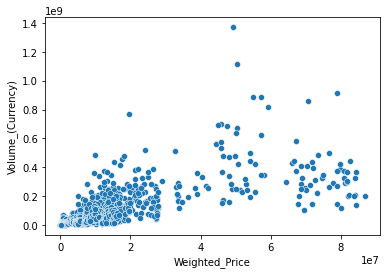

In [40]:
#scatter plot
sns.scatterplot(data=df_new,x='Weighted_Price',y="Volume_(Currency)")

We can observe that the average price of Bitcoin and its real currency value loosely follow a linear distribution. In the beginning, they exhibit a strong positive linear relationship, but as the data progresses, the data points scatter and deviate from linearity. This suggests that when the price of Bitcoin was low, its real currency value remained consistent. However, as the price increased, the relationship between Bitcoin's price and its real currency value became more variable, indicating a divergence from the initial linear trend

In [45]:
func1={
    'Volume_(BTC)':'sum',
    'Volume_(Currency)':'sum',
    'Weighted_Price':'sum'
}

# Analysing it based on Year
df_year = df.resample('Y').apply(func)
df_year

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.58,4.39,4.482500,9.531788e+01,4.253203e+02,1.788641e+01
2012-12-31,4.58,16.41,3.80,10.093934,5.679486e+05,5.764800e+06,2.687969e+05
2013-12-31,13.24,1163.00,12.77,254.264327,5.031147e+06,1.551177e+09,8.129691e+07
2014-12-31,732.00,995.00,275.00,527.137609,5.024184e+06,2.615293e+09,2.098838e+08
2015-12-31,321.00,502.00,152.40,274.364343,5.525311e+06,1.545445e+09,1.022613e+08
2016-12-31,430.89,980.74,1.50,558.905550,1.992263e+06,1.112464e+09,1.967848e+08
2017-12-31,966.34,19666.00,751.34,4155.146585,4.698753e+06,2.177582e+10,2.008128e+09
2018-12-31,13880.00,17234.99,3122.28,7576.778120,3.932327e+06,3.074667e+10,3.831992e+09
2019-12-31,3693.85,13880.00,3322.19,7426.850617,2.994600e+06,2.315854e+10,3.775550e+09


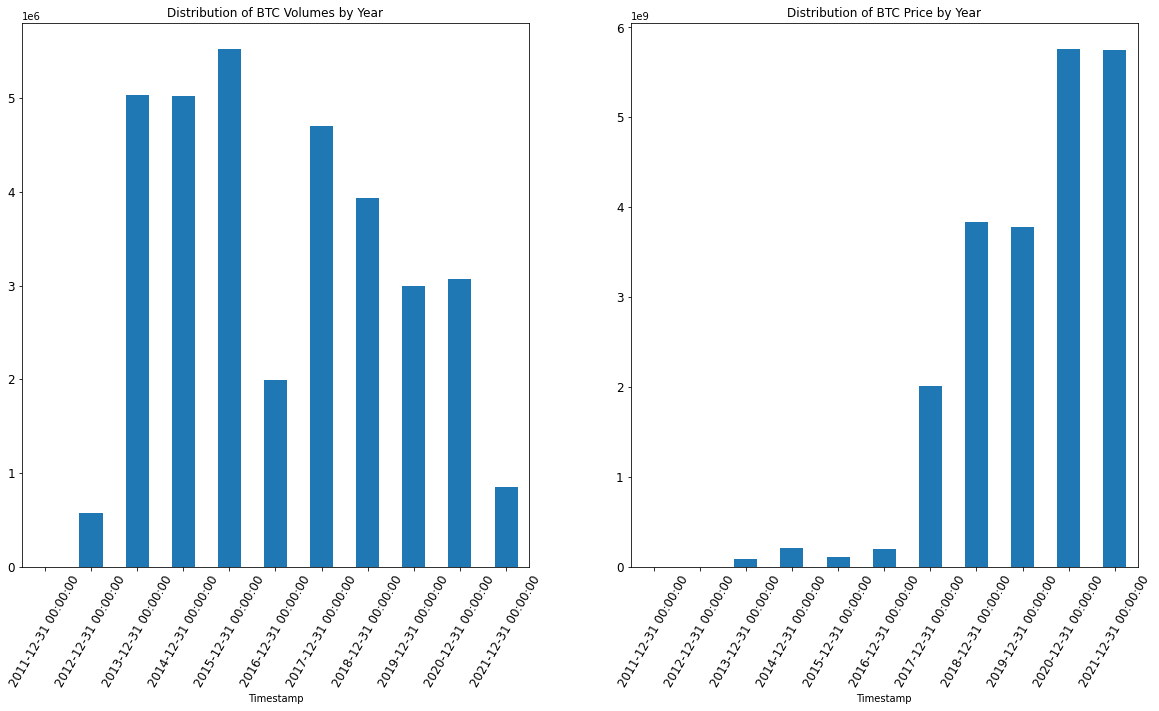

In [57]:
# bar plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot for Volume_(BTC)
df_year.plot(kind="bar", y="Volume_(BTC)", legend=False, fontsize=12, ax=axes[0],
             title="Distribution of BTC Volumes by Year")
axes[0].tick_params(axis='x', rotation=60)

# Plot for Weighted_Price
df_year.plot(kind="bar", y="Weighted_Price", legend=False, fontsize=12, ax=axes[1],
             title="Distribution of BTC Price by Year")
axes[1].tick_params(axis='x', rotation=60)

plt.show();

We can infer that the trading volume of Bitcoins was very high in 2014 and 2017. However, the price of Bitcoin surged after 2018.